In [10]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [11]:
y_target = np.load("labels.npz")['a']
X_features = np.load("features.npz")['a']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 42)

In [13]:
model_gbm = GradientBoostingClassifier(n_estimators=500,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      n_iter_no_change=20,
                                      verbose=1)

model_gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3365            5.79m
         2           1.2934            5.59m
         3           1.2631            5.48m
         4           1.2304            5.37m
         5           1.1961            5.34m
         6           1.1637            5.28m
         7           1.1340            5.26m
         8           1.1067            5.24m
         9           1.0821            5.21m
        10           1.0527            5.17m
        20           0.8579            5.07m
        30           0.6989            4.93m
        40           0.5878            4.84m


GradientBoostingClassifier(n_estimators=500, n_iter_no_change=20, verbose=1)

In [14]:
model_gbm_score = model_gbm.score(X_train,y_train)*100
print(f'Training Accuracy is {round(model_gbm_score, 2)} %')
y_pred = model_gbm.predict(X_test)
gbm_test_acc = (metrics.accuracy_score(y_test, y_pred)*100)
print(f"Testing Accuracy is {round(gbm_test_acc, 2)} %")

Training Accuracy is 96.26 %
Testing Accuracy is 62.29 %


Confusion matrix for logistic regression: 


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


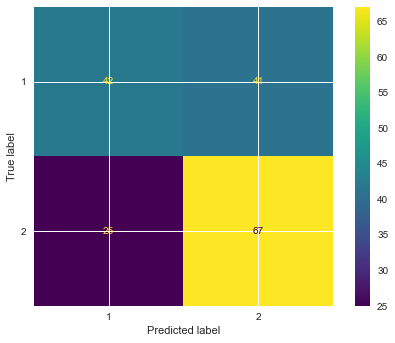

In [15]:
print("Confusion matrix for logistic regression: ")
plot_confusion_matrix(model_gbm, X_test, y_test)  
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_test, model_gbm.predict(X_test)))

print(accuracy_score(y_test, model_gbm.predict(X_test)))

              precision    recall  f1-score   support

           1       0.63      0.51      0.56        83
           2       0.62      0.73      0.67        92

    accuracy                           0.62       175
   macro avg       0.62      0.62      0.61       175
weighted avg       0.62      0.62      0.62       175

0.6228571428571429


In [17]:
from sklearn.model_selection import KFold, cross_val_score 

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model_gbm, X_test, y_test, cv = k_folds) 
print("Average CV Score: ", scores.mean())

      Iter       Train Loss   Remaining Time 
         1           1.2339           56.73s
         2           1.1098            1.03m
         3           1.0079            1.01m
         4           0.9178           58.75s
         5           0.8409           57.25s
         6           0.7818           55.78s
         7           0.7171           54.54s
         8           0.6572           53.63s
         9           0.6069           52.81s
        10           0.5570           52.18s
        20           0.2752           48.59s
      Iter       Train Loss   Remaining Time 
         1           1.2585           39.50s
         2           1.1445           44.83s
         3           1.0715           46.40s
         4           0.9826           46.99s
         5           0.9068           46.92s
         6           0.8552           47.11s
         7           0.7895           47.63s
         8           0.7362           47.49s
         9           0.6941           48.73s
        

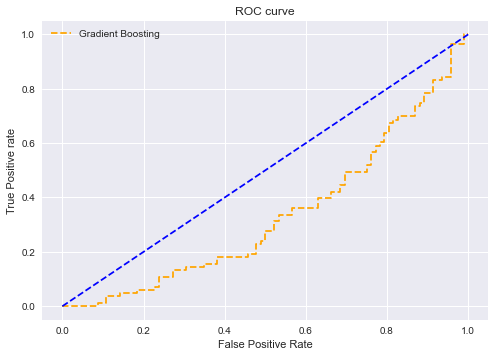

In [18]:
# predict probabilities
pred_prob = model_gbm.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Gradient Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();